In [33]:
from pandas import *
import numpy as np
from pandas import *
from statsmodels.formula.api import ols
import matplotlib.pyplot as plt
%precision 3
%matplotlib inline 
# use qt wx etc instead of inline for window plot- easies saving

In [2]:
x=np.linspace(-5,5,20)
np.random.seed(1)
y = -5 + 3*x + 4 * np.random.normal(size=x.shape)
data = pandas.DataFrame({'x': x, 'y': y})

In [3]:
model = ols("y~x", data).fit()

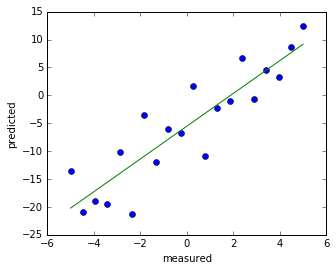

In [34]:
offset, coef = model._results.params
plt.figure(figsize=(5, 4))
plt.plot(x, y, 'o')
plt.plot(x, x*coef + offset)
plt.xlabel('measured')
plt.ylabel('predicted')

In [35]:
#intcpt = format(offset, '.3f') 
#slope = format(coef, '.3f')
# intcpt, slope 
coef, offset

(2.937, -5.533)

In [6]:
print(model.summary())  

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.804
Model:                            OLS   Adj. R-squared:                  0.794
Method:                 Least Squares   F-statistic:                     74.03
Date:                Mon, 11 Jul 2016   Prob (F-statistic):           8.56e-08
Time:                        15:19:52   Log-Likelihood:                -57.988
No. Observations:                  20   AIC:                             120.0
Df Residuals:                      18   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [95.0% Conf. Int.]
------------------------------------------------------------------------------
Intercept     -5.5335      1.036     -5.342      0.0